# Hanoi Weather Data - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on Hanoi weather data to understand patterns, trends, and relationships that will inform our temperature forecasting model.

## Objectives
1. Load and understand the dataset structure
2. Analyze data quality and missing values
3. Explore temperature patterns and seasonality
4. Investigate relationships between weather variables
5. Identify potential features for forecasting
6. Visualize key insights and trends


## 1. Setup and Imports

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

## 2. Data Loading and Initial Understanding

### Weather Data Elements for Hanoi (Daily, Metric Units)

This table outlines the weather data elements for Hanoi, Vietnam, using the metric unit group (°C, mm, cm, km) for daily aggregations. Data is sourced from the Timeline Weather API, with measurements recorded at standard heights (e.g., temperature at 2 meters above ground, wind speed at 10 meters). Each element includes its meaning and values (units or data type). The local timezone for Hanoi is UTC+07:00. The current date and time are Monday, October 13, 2025, 11:28 PM UTC+07:00.

#### Weather Data Elements

| **Feature Name**     | **Meaning**                                                                                                            | **(unit) Values**                                                                     |
|----------------------|-----------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------|
| **name**             | Name of the location, indicating the city or region for which the weather data is recorded.                            | String (e.g., "Hanoi")                                                                |
| **datetime**         | Date of the daily weather record in the local timezone (Hanoi: UTC+07:00).                                             | ISO 8601 format (e.g., "2025-10-13") (string)                                         |
| **tempmax**          | Maximum temperature recorded for the day, measured 2 meters above ground.                                              | °C (numeric)                                                                          |
| **tempmin**          | Minimum temperature recorded for the day, measured 2 meters above ground.                                              | °C (numeric)                                                                          |
| **temp**             | Mean (average) temperature for the day, calculated from hourly values.                                                 | °C (numeric)                                                                          |
| **feelslikemax**     | Maximum “feels like” temperature for the day, combining heat index (temperature >26.7°C, humidity >40%) or wind chill (temperature <10°C, wind speed >5 kph). | °C (numeric)                                                                          |
| **feelslikemin**     | Minimum “feels like” temperature for the day, based on heat index or wind chill.                                       | °C (numeric)                                                                          |
| **feelslike**        | Mean “feels like” temperature for the day, averaged from hourly values.                                                | °C (numeric)                                                                          |
| **dew**              | Dew point temperature, indicating when air reaches 100% humidity.                                                      | °C (numeric)                                                                          |
| **humidity**         | Relative humidity, the ratio of water vapor to the maximum possible at the given temperature, averaged for the day.    | % (numeric, 0–100)                                                                    |
| **precip**           | Total precipitation (rain, snow, etc.) that fell or is predicted to fall during the day, summed from hourly values.     | mm (numeric)                                                                          |
| **precipprob**       | Maximum probability of precipitation for the day, based on hourly percentage chances.                                  | % (numeric, 0–100)                                                                    |
| **precipcover**      | Proportion of time with measurable precipitation during the day (e.g., 6 hours of rain in a day = 25%).                | % (numeric, 0–100)                                                                    |
| **preciptype**       | Types of precipitation recorded or predicted for the day, aggregated from hourly values.                               | List of: "rain", "snow", "freezing rain", "ice" (categorical)                         |
| **snow**             | Total new snow that fell during the day, summed from hourly values.                                                    | cm (numeric)                                                                          |
| **snowdepth**        | Average snow depth on the ground during the day, maximum of hourly values.                                             | cm (numeric)                                                                          |
| **windgust**         | Maximum wind gust (short-term wind speed, typically <20 seconds) during the day, recorded if >18 kph above mean.       | kph (numeric, null if criteria not met)                                               |
| **windspeed**        | Maximum wind speed for the day, measured 10 meters above ground, from hourly averages over 2-minute periods.           | kph (numeric)                                                                         |
| **winddir**          | Wind direction from which the wind blows, in degrees (0° = North, 90° = East, 180° = South, 270° = West).              | Degrees (numeric, 0–360)                                                              |
| **sealevelpressure** | Atmospheric pressure adjusted to sea level, averaged from hourly values.                                               | mb (numeric)                                                                          |
| **cloudcover**       | Percentage of sky covered by clouds at all altitudes, averaged from hourly values.                                     | % (numeric, 0–100)                                                                    |
| **visibility**       | Distance visible in daylight, accounting for haze, mist, fog, or smoke, averaged from hourly values.                   | km (numeric)                                                                          |
| **solarradiation**   | Average solar radiation power during the day, measured in watts per square meter.                                      | W/m² (numeric)                                                                        |
| **solarenergy**      | Total solar energy accumulated during the day, summed from hourly values.                                              | MJ/m² (numeric)                                                                       |
| **uvindex**          | Maximum UV radiation exposure index for the day, based on cloud cover, time, and altitude.                             | Integer (0–10)                                                                        |
| **severerisk**       | Indicator of severe weather risk (e.g., storms, typhoons).                                                             | Numeric (0–10) or categorical ("low", "medium", "high")                               |
| **sunrise**          | Local time of sunrise for the day.                                                                                    | Local time (string, e.g., "06:00")                                                    |
| **sunset**           | Local time of sunset for the day.                                                                                     | Local time (string, e.g., "18:00")                                                    |
| **moonphase**        | Decimal value representing the moon phase (0 = New Moon, 0.25 = First Quarter, 0.5 = Full Moon, 0.75 = Last Quarter). | Numeric (0–1)                                                                         |
| **conditions**       | Short text summary of notable weather conditions for the day, dependent on station data.                               | Categorical (e.g., "Clear", "Partly Cloudy", "Rain")                                  |
| **description**      | Detailed human-readable description of the day’s weather, translatable via the `lang` API parameter.                   | String (e.g., "Partly cloudy with a chance of rain")                                  |
| **icon**             | Text code for selecting a weather icon, compatible with icon sets in the Weather API.                                  | Categorical (e.g., "clear-day", "rain", "partly-cloudy-day")                          |
| **stations**         | List or ID of weather stations providing data for the day.                                                             | String or list (e.g., "VHHH, RVHN")                                                   |

#### Notes
- The **(unit) Values** column specifies the units (e.g., °C, mm, kph) or data type (e.g., string, numeric, categorical) for each element.
- Daily aggregations are derived from hourly data (e.g., `tempmax` is the maximum of hourly temperatures, `precip` is the sum of hourly precipitation).

In [2]:
# Load the daily weather data
df = pd.read_csv('../data/raw/daily_data.csv')

# Basic information about the dataset
print("HANOI WEATHER DATASET OVERVIEW:")
print(f"Dataset Shape: {df.shape}")
print(f"Records: {df.shape[0]:,} days")
print(f"Features: {df.shape[1]} variables")
print(f"Location: {df['name'].iloc[0]}")

# Date range
df['datetime'] = pd.to_datetime(df['datetime'])
print(f"Date Range: {df['datetime'].min().date()} to {df['datetime'].max().date()}")
print(f"Total Years: {(df['datetime'].max() - df['datetime'].min()).days / 365.25:.1f}")

HANOI WEATHER DATASET OVERVIEW:
Dataset Shape: (3654, 33)
Records: 3,654 days
Features: 33 variables
Location: Hanoi
Date Range: 2015-10-01 to 2025-10-01
Total Years: 10.0


In [3]:
# Display first few rows and column information
print("FIRST 5 RECORDS:")
print(df.head())

FIRST 5 RECORDS:
    name   datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  Hanoi 2015-10-01     34.1     24.0  29.6          39.7          24.0   
1  Hanoi 2015-10-02     32.1     24.5  27.6          36.6          24.5   
2  Hanoi 2015-10-03     32.1     25.7  28.6          37.5          25.7   
3  Hanoi 2015-10-04     32.0     25.5  28.9          35.8          25.5   
4  Hanoi 2015-10-05     31.2     24.0  27.4          36.1          24.0   

   feelslike   dew  humidity  precip  precipprob  precipcover preciptype  \
0       34.3  24.1      73.8    5.60         100        29.17       rain   
1       30.2  23.6      79.9   11.14         100        12.50       rain   
2       31.6  23.8      76.7    0.11         100         4.17       rain   
3       31.2  22.1      68.2    2.40         100         8.33       rain   
4       28.8  20.9      68.1    0.00           0         0.00        NaN   

   snow  snowdepth  windgust  windspeed  winddir  sealevelpressure  \
0    

In [4]:
print("DATASET INFO:")
print(df.info())

DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              3654 non-null   object        
 1   datetime          3654 non-null   datetime64[ns]
 2   tempmax           3654 non-null   float64       
 3   tempmin           3654 non-null   float64       
 4   temp              3654 non-null   float64       
 5   feelslikemax      3654 non-null   float64       
 6   feelslikemin      3654 non-null   float64       
 7   feelslike         3654 non-null   float64       
 8   dew               3654 non-null   float64       
 9   humidity          3654 non-null   float64       
 10  precip            3654 non-null   float64       
 11  precipprob        3654 non-null   int64         
 12  precipcover       3654 non-null   float64       
 13  preciptype        2667 non-null   object        
 14  snow      

In [5]:
print("COLUMN NAMES:")
print([col for col in df.columns])

COLUMN NAMES:
['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations']


## 3. Data Quality Assessment

In [6]:
# Check for missing values and duplicates
print("MISSING VALUES ANALYSIS:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_data, 'Percentage': missing_percent})
print(missing_df[missing_df['Missing Count'] > 0])

print(f"\nDUPLICATE RECORDS: {df.duplicated().sum()}")

# Basic statistics for numerical columns
print("\nDESCRIPTIVE STATISTICS:")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(df[numerical_cols].describe())

MISSING VALUES ANALYSIS:
            Missing Count  Percentage
preciptype            987       27.01
severerisk           2654       72.63

DUPLICATE RECORDS: 0

DESCRIPTIVE STATISTICS:
       tempmax  tempmin     temp  feelslikemax  feelslikemin  feelslike  \
count  3654.00  3654.00  3654.00       3654.00       3654.00    3654.00   
mean     28.45    21.87    24.83         32.52         22.62      27.30   
std       5.81     4.86     5.11          9.52          6.04       7.71   
min       8.00     5.90     7.00          8.00          2.10       4.60   
25%      24.10    18.00    21.00         24.10         18.00      21.00   
50%      29.30    23.00    26.00         32.60         23.00      26.85   
75%      33.00    26.00    28.90         41.10         26.00      33.70   
max      41.90    31.00    35.50         52.50         40.40      46.20   

           dew  humidity   precip  precipprob  precipcover    snow  snowdepth  \
count  3654.00   3654.00  3654.00     3654.00      3654.0

## 4. Temperature Analysis & Seasonality

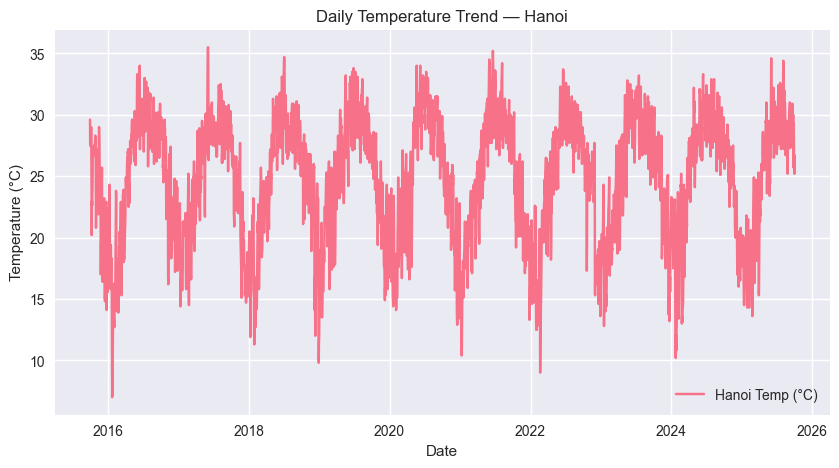

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(df["datetime"], df["temp"], label="Hanoi Temp (°C)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Daily Temperature Trend — Hanoi")
plt.legend()
plt.grid(True)
plt.show()

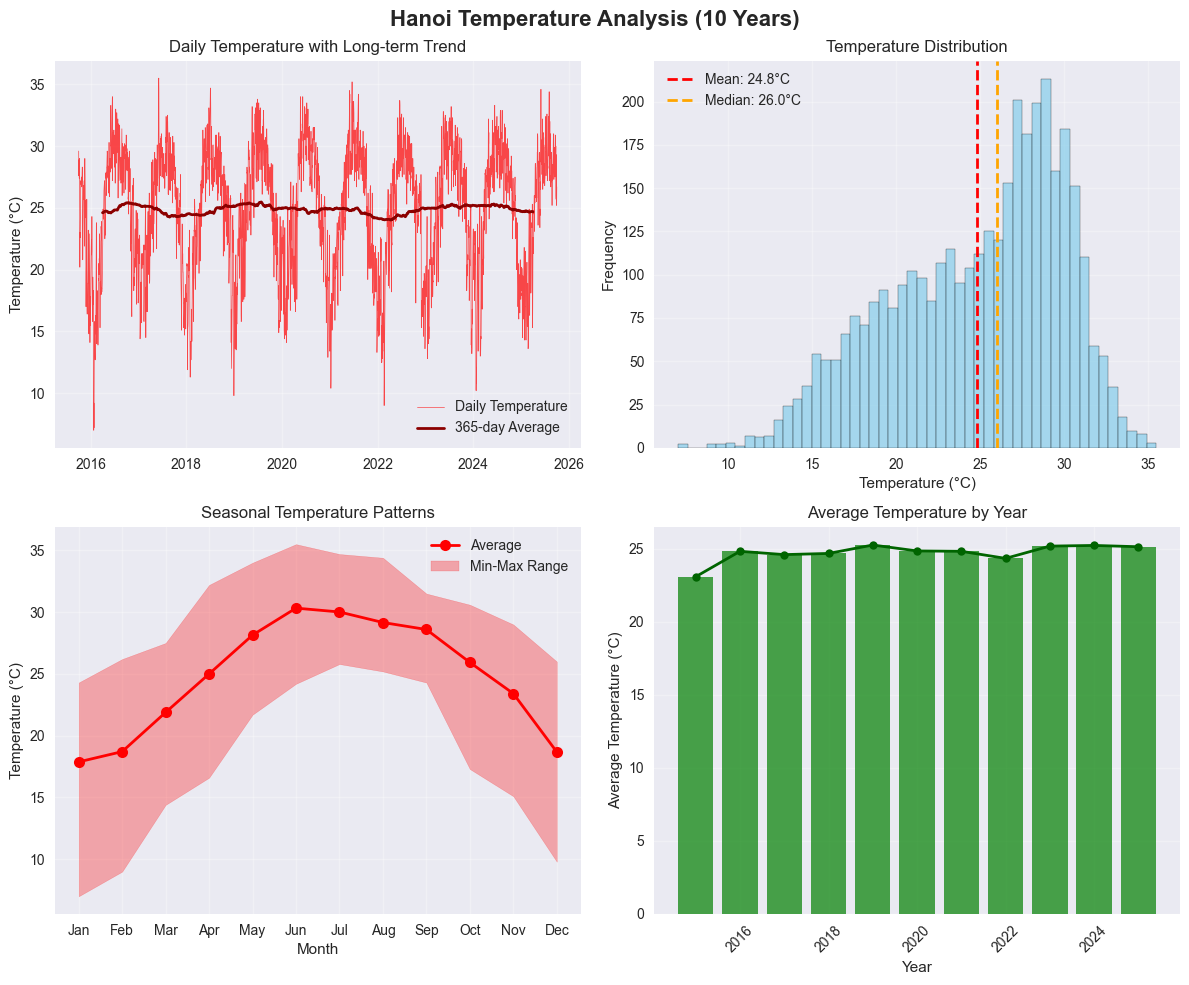

HANOI TEMPERATURE STATISTICS:
Average Temperature: 24.83°C
Median Temperature:  26.00°C
Standard Deviation:  5.11°C
Minimum Temperature: 7.00°C
Maximum Temperature: 35.50°C
Temperature Range:   28.50°C

Seasonal Temperature Averages:
Winter (Dec-Feb): 18.42°C
Spring (Mar-May): 25.01°C
Summer (Jun-Aug): 29.83°C
Autumn (Sep-Nov): 25.98°C


In [23]:
# Enhanced temperature analysis with rolling averages and detailed insights
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_year'] = df['datetime'].dt.dayofyear
df['temp_range'] = df['tempmax'] - df['tempmin']

# Weather visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Hanoi Temperature Analysis (10 Years)", fontsize=16, fontweight='bold')

# 1. Temperature time series
axes[0, 0].plot(df['datetime'], df['temp'], alpha=0.7, color='red', linewidth=0.5, label='Daily Temperature')
df['temp_rolling_365'] = df['temp'].rolling(window=365, center=True).mean()
axes[0, 0].plot(df['datetime'], df['temp_rolling_365'], color='darkred', linewidth=2, label='365-day Average')
axes[0, 0].set_title('Daily Temperature with Long-term Trend')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Temperature distribution with statistics
axes[0, 1].hist(df['temp'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 1].axvline(df['temp'].mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {df["temp"].mean():.1f}°C')
axes[0, 1].axvline(df['temp'].median(), color='orange', linestyle='--', linewidth=2, 
                   label=f'Median: {df["temp"].median():.1f}°C')
axes[0, 1].set_title('Temperature Distribution')
axes[0, 1].set_xlabel('Temperature (°C)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Seasonal patterns
monthly_temp = df.groupby('month')['temp'].agg(['mean', 'min', 'max'])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[1, 0].plot(monthly_temp.index, monthly_temp['mean'], marker='o', linewidth=2, 
                markersize=8, color='red', label='Average')
axes[1, 0].fill_between(monthly_temp.index, monthly_temp['min'], monthly_temp['max'], 
                        alpha=0.3, color='red', label='Min-Max Range')
axes[1, 0].set_title('Seasonal Temperature Patterns')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Temperature (°C)')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].set_xticklabels(months)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Yearly temperature trends
yearly_temp = df.groupby('year')['temp'].mean()
axes[1, 1].bar(yearly_temp.index, yearly_temp.values, alpha=0.7, color='green')
axes[1, 1].plot(yearly_temp.index, yearly_temp.values, color='darkgreen', marker='o', 
                linewidth=2, markersize=6)
axes[1, 1].set_title('Average Temperature by Year')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Average Temperature (°C)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("HANOI TEMPERATURE STATISTICS:")
print(f"Average Temperature: {df['temp'].mean():.2f}°C")
print(f"Median Temperature:  {df['temp'].median():.2f}°C")
print(f"Standard Deviation:  {df['temp'].std():.2f}°C")
print(f"Minimum Temperature: {df['temp'].min():.2f}°C")
print(f"Maximum Temperature: {df['temp'].max():.2f}°C")
print(f"Temperature Range:   {df['temp'].max() - df['temp'].min():.2f}°C")

# Seasonal analysis
print("\nSeasonal Temperature Averages:")
seasons = {
    'Winter (Dec-Feb)': [12, 1, 2],
    'Spring (Mar-May)': [3, 4, 5],
    'Summer (Jun-Aug)': [6, 7, 8],
    'Autumn (Sep-Nov)': [9, 10, 11]
}

for season, months in seasons.items():
    season_temp = df[df['month'].isin(months)]['temp'].mean()
    print(f"{season}: {season_temp:.2f}°C")

### Observations on Hanoi Temperature (2015–2025)
1. Strong Seasonal Cycle

- The temperature pattern repeats every year, with distinct summer and winter peaks.

- Hottest months: May to August — temperatures often reach 30–35°C.

- Coolest months: December to February — temperatures drop to around 15–18°C.

- This reflects Hanoi’s tropical monsoon climate: hot, humid summers and mild, dry winters.

2. Stable Long-Term Range

- Across the 10 years, the overall range remains consistent (roughly 15°C to 35°C).

- There’s no clear long-term cooling or warming trend — temperatures fluctuate seasonally but stay within similar bounds.

3. Occasional Extremes

- Some sharp drops below 10°C appear in winters — likely short cold snaps or strong cold fronts from the northeast.

- Brief spikes above 35°C occur during mid-year — consistent with Hanoi’s occasional heat waves.

4. Seasonal Asymmetry

- The warming (spring to summer) period seems steeper than the cooling (autumn to winter) period — summers heat up quickly, while cooling happens more gradually.

5. No Drastic Climate Shift Detected

- Over the decade, Hanoi’s temperature cycle looks remarkably stable, with no major upward drift that would indicate a strong warming trend — at least not in daily mean temperature.

## 5. Weather Variables Correlation

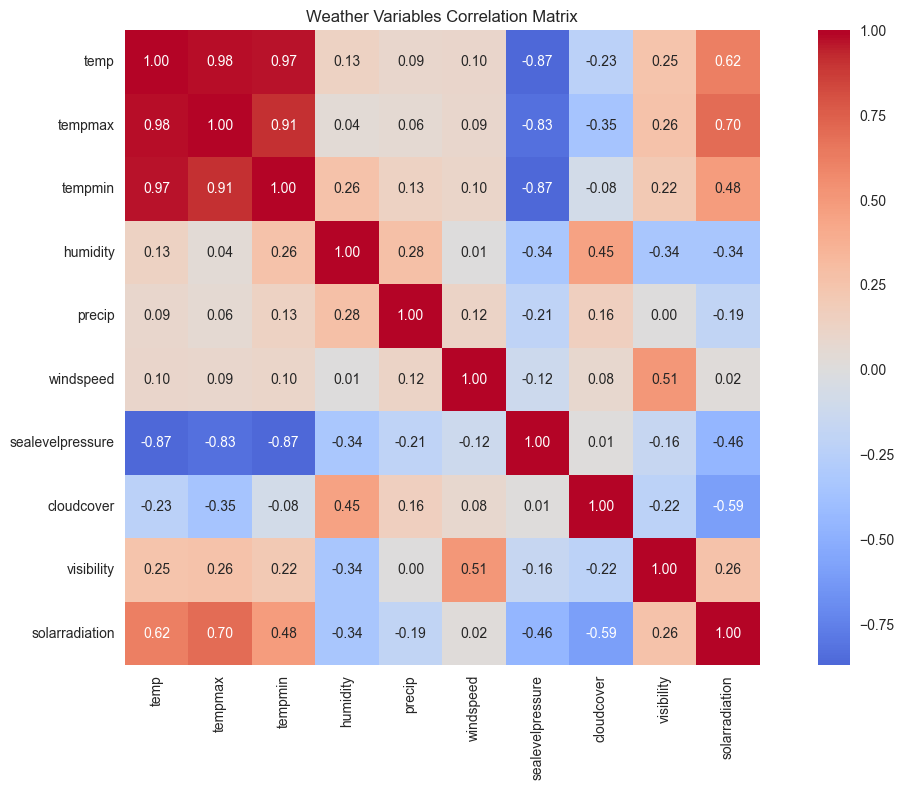

TEMPERATURE CORRELATIONS:
temp                1.00
tempmax             0.98
tempmin             0.97
solarradiation      0.62
visibility          0.25
humidity            0.13
windspeed           0.10
precip              0.09
cloudcover         -0.23
sealevelpressure   -0.87
Name: temp, dtype: float64


In [25]:
# Key numerical features for correlation analysis
key_features = ['temp', 'tempmax', 'tempmin', 'humidity', 'precip', 'windspeed', 
                'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation']

correlation_matrix = df[key_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Weather Variables Correlation Matrix')
plt.tight_layout()
plt.show()

# Temperature correlations specifically
temp_corr = df[key_features].corr()['temp'].sort_values(ascending=False)
print("TEMPERATURE CORRELATIONS:")
print(temp_corr)

## 6. Advanced Weather Patterns

WEATHER CONDITIONS ANALYSIS

WEATHER CONDITIONS DISTRIBUTION:
Total unique conditions: 6

Most common conditions:
 1. Rain, Partially cloudy        : 2155 days ( 59.0%)
 2. Partially cloudy              :  774 days ( 21.2%)
 3. Rain, Overcast                :  461 days ( 12.6%)
 4. Clear                         :  178 days (  4.9%)
 5. Overcast                      :   76 days (  2.1%)
 6. Rain                          :   10 days (  0.3%)

Average temperature by weather condition:
Condition                      Avg Temp (°C) Count 
--------------------------------------------------
Rain                               27.7       10
Rain, Partially cloudy             26.3     2155
Partially cloudy                   24.1      774
Clear                              22.2      178
Rain, Overcast                     20.6      461
Overcast                           20.4       76


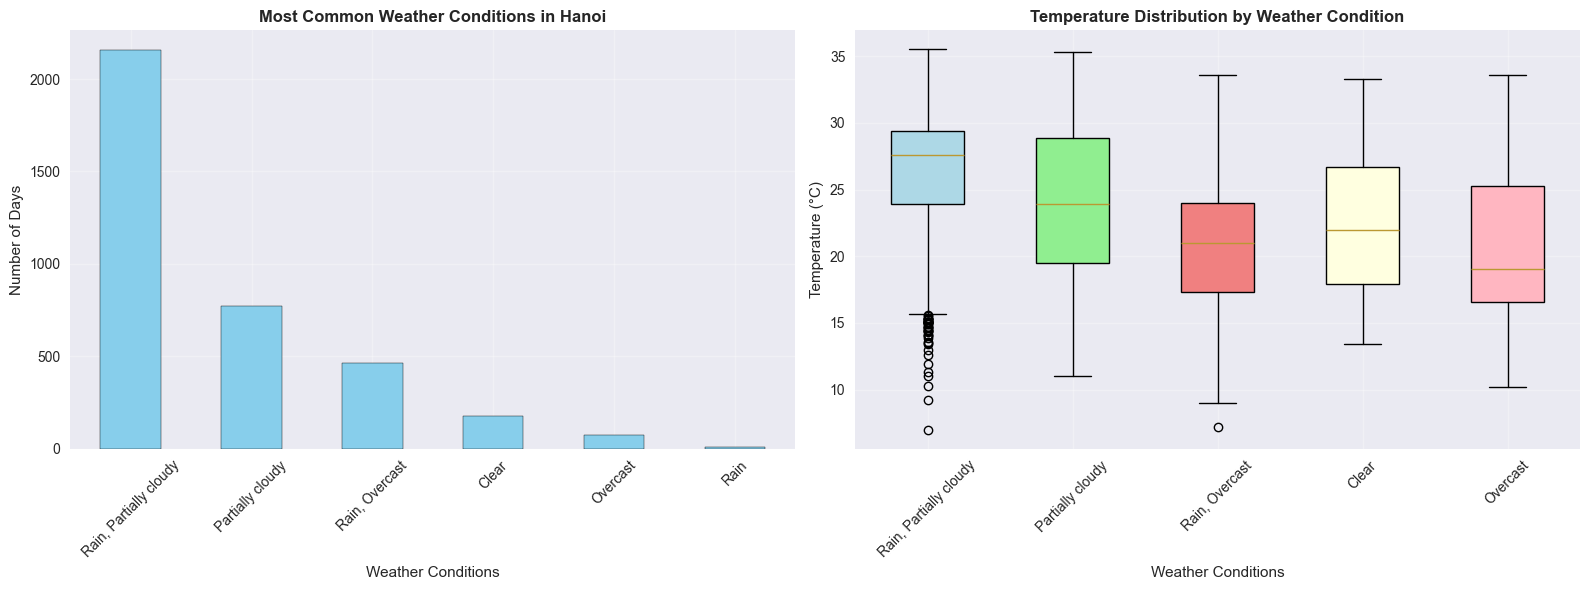

In [32]:
print("WEATHER CONDITIONS ANALYSIS")

# Analyze weather conditions patterns
if 'conditions' in df.columns:
    print("\nWEATHER CONDITIONS DISTRIBUTION:")
    conditions_counts = df['conditions'].value_counts()
    print(f"Total unique conditions: {len(conditions_counts)}")

    print("\nMost common conditions:")
    for i, (condition, count) in enumerate(conditions_counts.head(10).items(), 1):
        percentage = (count / len(df)) * 100
        print(f"{i:2d}. {condition:30s}: {count:4d} days ({percentage:5.1f}%)")
    
    # Temperature by weather condition
    temp_by_condition = df.groupby('conditions')['temp'].agg(['mean', 'std', 'count']).round(2)
    temp_by_condition = temp_by_condition[temp_by_condition['count'] >= 10]
    temp_by_condition = temp_by_condition.sort_values('mean', ascending=False)
    
    print(f"\nAverage temperature by weather condition:")
    print(f"{'Condition':<30} {'Avg Temp (°C)':<12} {'Count':<6}")
    print("-" * 50)
    for condition, row in temp_by_condition.head(10).iterrows():
        print(f"{condition:<30} {row['mean']:8.1f}     {row['count']:4.0f}")

# Visualize weather conditions
if 'conditions' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Weather conditions frequency
    top_conditions = conditions_counts.head(8)
    top_conditions.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
    axes[0].set_title('Most Common Weather Conditions in Hanoi', fontweight='bold')
    axes[0].set_xlabel('Weather Conditions')
    axes[0].set_ylabel('Number of Days')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3)
    
    # Temperature by weather condition
    top_5_conditions = conditions_counts.head(5).index
    temp_data = [df[df['conditions'] == condition]['temp'].values for condition in top_5_conditions]
    bp = axes[1].boxplot(temp_data, labels=top_5_conditions, patch_artist=True)
    
    # Color the boxes
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        
    axes[1].set_title('Temperature Distribution by Weather Condition', fontweight='bold')
    axes[1].set_xlabel('Weather Conditions')
    axes[1].set_ylabel('Temperature (°C)')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

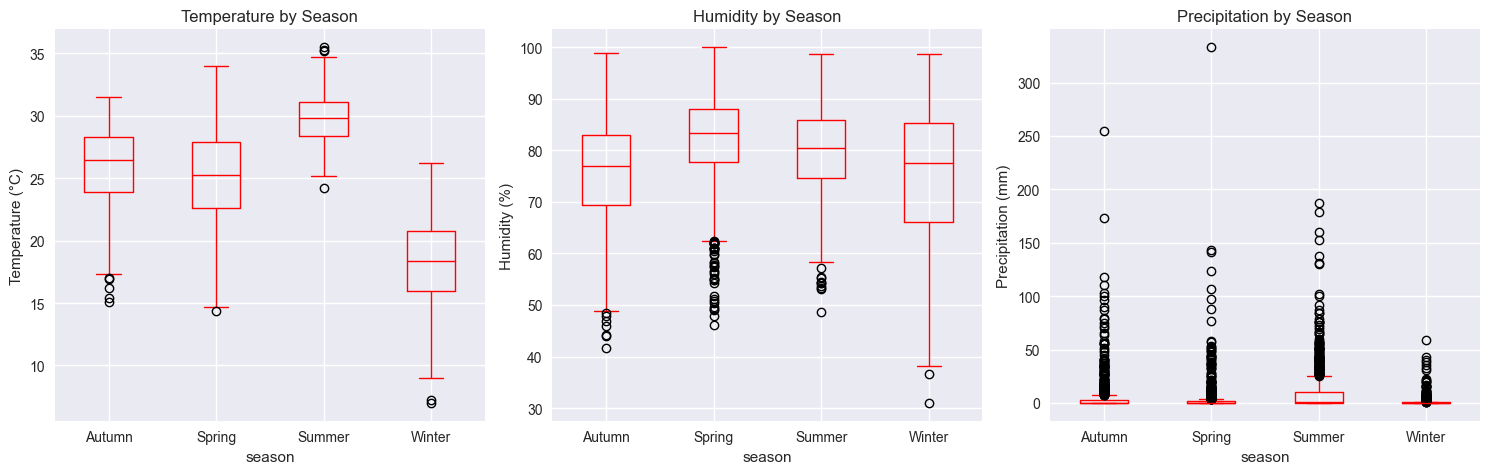

EXTREME TEMPERATURE DAYS:
Very hot days (>95th percentile): 181
Very cold days (<5th percentile): 167

RAINY DAYS:
Days with precipitation: 2626 (71.9%)


In [35]:
# Seasonal analysis
df['season'] = df['month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                3: 'Spring', 4: 'Spring', 5: 'Spring',
                                6: 'Summer', 7: 'Summer', 8: 'Summer',
                                9: 'Autumn', 10: 'Autumn', 11: 'Autumn'})

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Temperature by season
df.boxplot(column='temp', by='season', ax=axes[0], color='r')
axes[0].set_title('Temperature by Season')
axes[0].set_ylabel('Temperature (°C)')

# Humidity by season  
df.boxplot(column='humidity', by='season', ax=axes[1], color='r')
axes[1].set_title('Humidity by Season')
axes[1].set_ylabel('Humidity (%)')

# Precipitation by season
df.boxplot(column='precip', by='season', ax=axes[2], color='r')
axes[2].set_title('Precipitation by Season')
axes[2].set_ylabel('Precipitation (mm)')

plt.suptitle('')  
plt.tight_layout()
plt.show()

# Extreme weather analysis
print("EXTREME TEMPERATURE DAYS:")
hot_days = df[df['tempmax'] > df['tempmax'].quantile(0.95)]
cold_days = df[df['tempmin'] < df['tempmin'].quantile(0.05)]
print(f"Very hot days (>95th percentile): {len(hot_days)}")
print(f"Very cold days (<5th percentile): {len(cold_days)}")

print(f"\nRAINY DAYS:")
rainy_days = df[df['precip'] > 0]
print(f"Days with precipitation: {len(rainy_days)} ({len(rainy_days)/len(df)*100:.1f}%)")

# 7. Outlier Detection & Analysis

OUTLIER ANALYSIS SUMMARY:
temp           :    3 outliers (0.1%)
humidity       :   86 outliers (2.4%)
precip         :  599 outliers (16.4%)
windspeed      :   43 outliers (1.2%)


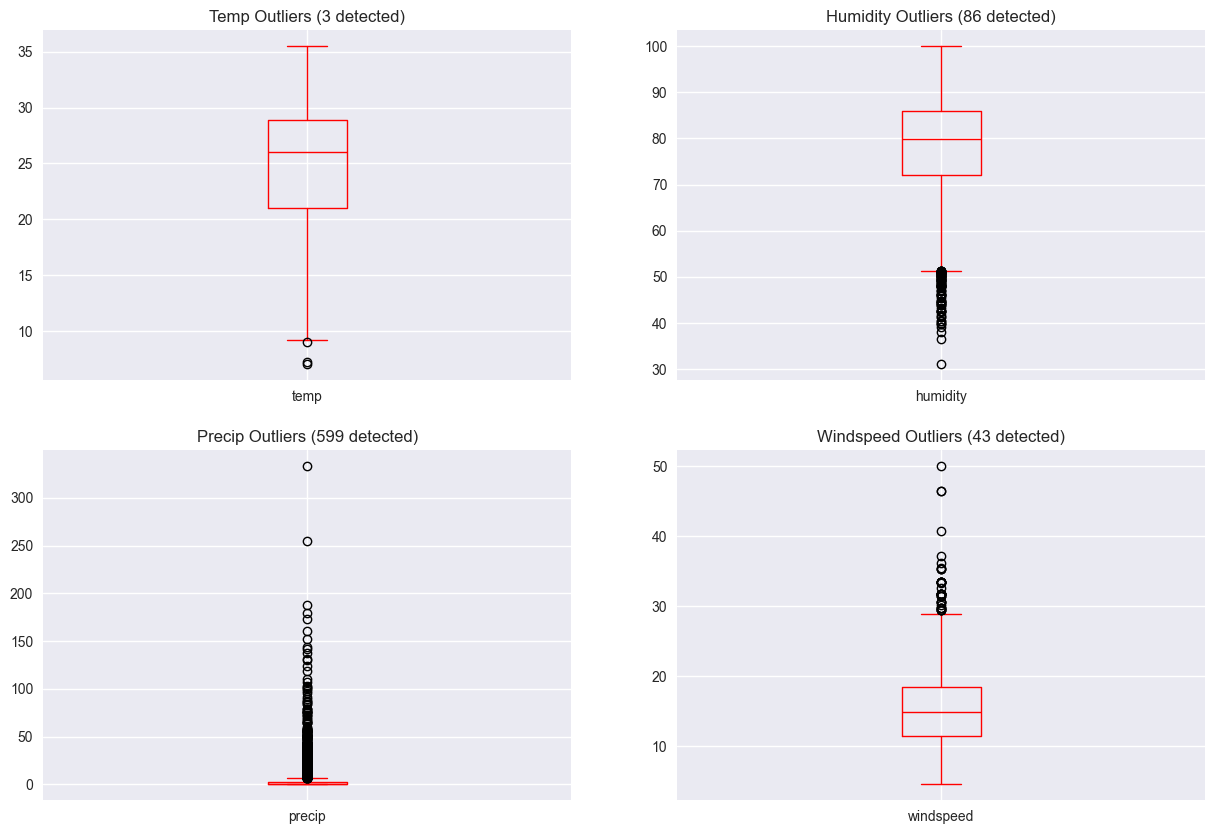

In [40]:
# Outlier detection using IQR and visualization
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyze outliers for key variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
variables = ['temp', 'humidity', 'precip', 'windspeed']
for i, var in enumerate(variables):
    row, col = i // 2, i % 2
    outliers, lower, upper = detect_outliers(df, var)
    
    # Box plot
    df.boxplot(column=var, ax=axes[row, col], color='r')
    axes[row, col].set_title(f'{var.title()} Outliers ({len(outliers)} detected)')
    
print("OUTLIER ANALYSIS SUMMARY:")
for var in variables:
    outliers, _, _ = detect_outliers(df, var)
    print(f"{var:15}: {len(outliers):4d} outliers ({len(outliers)/len(df)*100:.1f}%)")

## 8. Time Series Decomposition

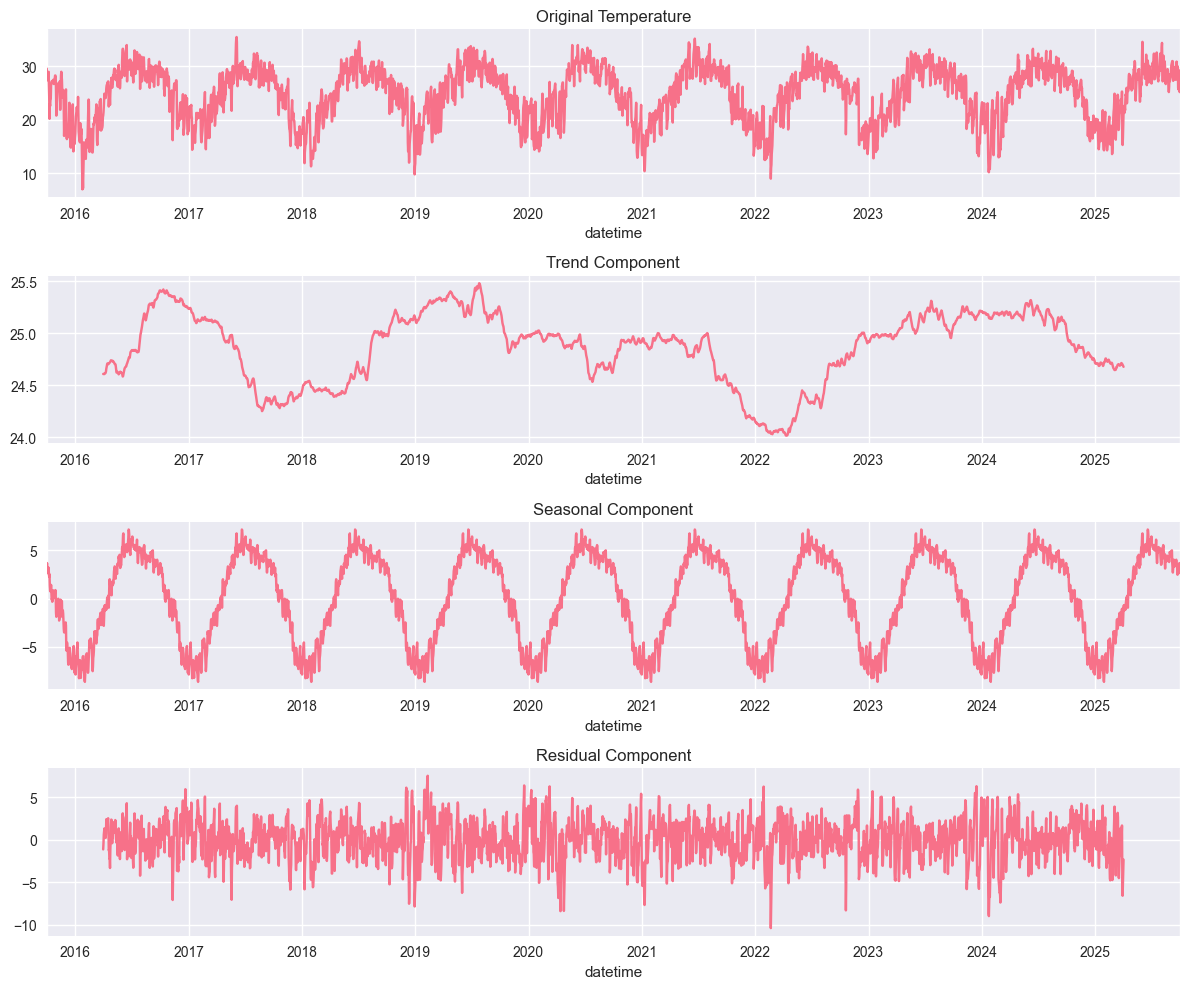

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose temperature time series
df_ts = df.set_index('datetime')['temp'].dropna()
decomposition = seasonal_decompose(df_ts, model='additive', period=365)

fig, axes = plt.subplots(4, 1, figsize=(12, 10))
decomposition.observed.plot(ax=axes[0], title='Original Temperature')
decomposition.trend.plot(ax=axes[1], title='Trend Component')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal Component')
decomposition.resid.plot(ax=axes[3], title='Residual Component')
plt.tight_layout()
plt.show()

## 9. Feature Engineering Insights

BASIC FEATURES CORRELATION WITH TEMPERATURE:
 1. tempmax             :   0.977
 2. tempmin             :   0.969
 3. sealevelpressure    :   0.867
 4. cloudcover          :   0.234
 5. month               :   0.230
 6. day_of_year         :   0.225
 7. humidity            :   0.131
 8. windspeed           :   0.096
 9. precip              :   0.093


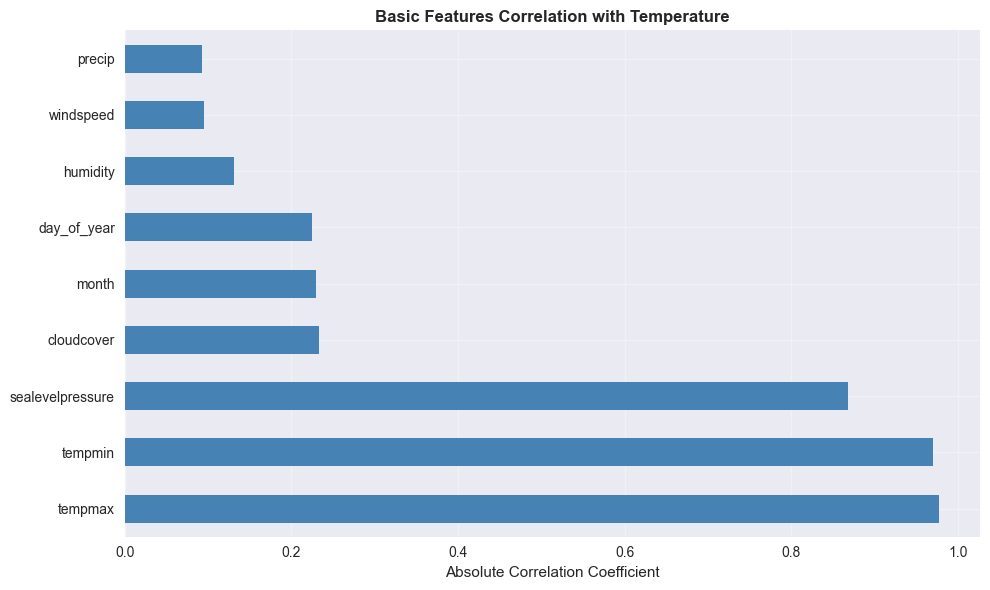


Key insight: tempmax shows strongest correlation (0.977)


In [38]:
# Basic feature correlation analysis
basic_features = ['tempmax', 'tempmin', 'humidity', 'precip', 'windspeed', 
                 'sealevelpressure', 'cloudcover', 'month', 'day_of_year']

# Simple correlation analysis for understanding relationships
available_basic = [f for f in basic_features if f in df.columns]
feature_correlations = df[available_basic + ['temp']].corr()['temp'].drop('temp').abs().sort_values(ascending=False)

print("BASIC FEATURES CORRELATION WITH TEMPERATURE:")
for i, (feature, corr) in enumerate(feature_correlations.items(), 1):
    print(f"{i:2d}. {feature:<20}: {corr:>7.3f}")

# Simple visualization
plt.figure(figsize=(10, 6))
feature_correlations.plot(kind='barh', color='steelblue')
plt.title('Basic Features Correlation with Temperature', fontweight='bold')
plt.xlabel('Absolute Correlation Coefficient')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nKey insight: {feature_correlations.index[0]} shows strongest correlation ({feature_correlations.iloc[0]:.3f})")